# Âü∫‰∫éXGBoostÁöÑÁü≠ÊúüÊ±áÁéáÈ¢ÑÊµãÊ®°Âûã

In [1]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from datetime import date
import requests
from requests.auth import HTTPBasicAuth
import pandas as pd
import numpy as np
import requests
from requests.auth import HTTPBasicAuth

from datetime import datetime, timedelta
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt


/Users/loki/PycharmProjects/PythonProject5/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


## Êï∞ÊçÆËé∑Âèñ

- yfinanceÂ∫ì

- Âà©ÁéáÊï∞ÊçÆ

In [2]:
# Ëé∑Âèñ‰∫∫Ê∞ëÂ∏ÅÂÖëËã±ÈïëÊ±áÁéáÔºàYahoo symbol: CNYGBP=XÔºâ
data = yf.download("CNYGBP=X", start="2015-01-01", end="2025-05-14")
er_df = data[["Close"]].rename(columns={"Close": "CNY/GBP"})
display(er_df.head())

[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


Price       CNY/GBP
Ticker     CNYGBP=X
Date               
2015-01-01  0.10342
2015-01-02  0.10333
2015-01-05  0.10492
2015-01-06  0.10535
2015-01-07  0.10645

## Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

In [3]:
er_df['inverse'] = 1 / er_df['CNY/GBP', 'CNYGBP=X']
er_df.head()

Price       CNY/GBP   inverse
Ticker     CNYGBP=X          
Date                         
2015-01-01  0.10342  9.669310
2015-01-02  0.10333  9.677731
2015-01-05  0.10492  9.531071
2015-01-06  0.10535  9.492169
2015-01-07  0.10645  9.394082

In [4]:
policy_df = pd.read_excel("IR.xlsx")
policy_df['rate_diff'] = policy_df['UK'] - policy_df['CN']
model_df = policy_df.copy()

In [5]:
er_df['inverse']

Date
2015-01-01    9.669310
2015-01-02    9.677731
2015-01-05    9.531071
2015-01-06    9.492169
2015-01-07    9.394082
                ...   
2025-05-07    9.639391
2025-05-08    9.603934
2025-05-09    9.562058
2025-05-12    9.620287
2025-05-13    9.493972
Name: inverse, Length: 2699, dtype: float64

In [6]:
# Á°Æ‰øù Date ÊòØ datetime Á±ªÂûã
model_df['Date'] = pd.to_datetime(model_df['Date'])

# ‰øùÁïôÂ∑•‰ΩúÊó•ÔºàÂë®‰∏ÄÂà∞Âë®‰∫îÔºâ
df_weekday = model_df[model_df['Date'].dt.dayofweek < 5].copy()

# ÊåâÊó•ÊúüÊéíÂ∫èÔºàÂèØÈÄâÔºâ
df_weekday = df_weekday.sort_values('Date').reset_index(drop=True)

In [7]:
df_weekday

Date    UK   CN  rate_diff
0    2015-01-01  0.50  5.6      -5.10
1    2015-01-02  0.50  5.6      -5.10
2    2015-01-05  0.50  5.6      -5.10
3    2015-01-06  0.50  5.6      -5.10
4    2015-01-07  0.50  5.6      -5.10
...         ...   ...  ...        ...
2699 2025-05-07  4.25  3.1       1.15
2700 2025-05-08  4.25  3.1       1.15
2701 2025-05-09  4.25  3.1       1.15
2702 2025-05-12  4.25  3.1       1.15
2703 2025-05-13  4.25  3.1       1.15

[2704 rows x 4 columns]

In [8]:
missing_dates = df_weekday[~df_weekday['Date'].isin(er_df.index)]
print(missing_dates['Date'].tail(10))


658    2017-07-11
750    2017-11-16
2609   2025-01-01
2686   2025-04-18
2687   2025-04-21
Name: Date, dtype: datetime64[ns]


In [9]:
# Á°Æ‰øù Date ÂàóÊ†ºÂºè‰∏ÄËá¥
df_weekday['Date'] = pd.to_datetime(df_weekday['Date']).dt.normalize()

# Á≠õÈÄâ df_weekday ‰∏≠‰ªÖ‰øùÁïôÈÇ£‰∫õÂá∫Áé∞Âú® er_df['Date'] ‰∏≠ÁöÑË°å
df_weekday_aligned = df_weekday[df_weekday['Date'].isin(er_df.index)].copy()

# ÈáçÁΩÆÁ¥¢ÂºïÔºàÂèØÈÄâÔºâ
df_weekday_aligned = df_weekday_aligned.reset_index(drop=True)

In [10]:
er_mid = er_df['inverse'].reset_index(drop=True)


In [11]:
df_weekday_aligned['ER'] = er_mid
df_weekday_aligned

Date    UK   CN  rate_diff        ER
0    2015-01-01  0.50  5.6      -5.10  9.669310
1    2015-01-02  0.50  5.6      -5.10  9.677731
2    2015-01-05  0.50  5.6      -5.10  9.531071
3    2015-01-06  0.50  5.6      -5.10  9.492169
4    2015-01-07  0.50  5.6      -5.10  9.394082
...         ...   ...  ...        ...       ...
2694 2025-05-07  4.25  3.1       1.15  9.639391
2695 2025-05-08  4.25  3.1       1.15  9.603934
2696 2025-05-09  4.25  3.1       1.15  9.562058
2697 2025-05-12  4.25  3.1       1.15  9.620287
2698 2025-05-13  4.25  3.1       1.15  9.493972

[2699 rows x 5 columns]

## Ê®°ÂûãÊûÑÂª∫

In [12]:
def recalculate_features(df):
    df = df.copy()

    # ÊªûÂêéÊî∂ÁõäÁéá
    df['return_1'] = df['ER'].pct_change()
    df['SMA_5'] = df['ER'].rolling(window=5).mean()
    df['SMA_10'] = df['ER'].rolling(window=10).mean()
    df['Momentum_5'] = df['ER'] - df['ER'].shift(5)
    df['Volatility_5'] = df['return_1'].rolling(window=5).std()

    df['SMA_diff'] = df['SMA_5'] - df['SMA_10']
    df['price_SMA5_ratio'] = df['ER'] / df['SMA_5']
    df['price_minus_SMA5'] = df['ER'] - df['SMA_5']

    df['return_2'] = df['ER'].pct_change(2)
    df['return_3'] = df['ER'].pct_change(3)

    df['rolling_std_10'] = df['ER'].rolling(window=10).std()

    df['vol_mom'] = df['Volatility_5'] * df['Momentum_5']
    df['price_return_interact'] = df['price_minus_SMA5'] * df['return_1']

    df['shock'] = (df['ER'].pct_change().abs() > 0.2).astype(int)

    df['trade_war'] = 0
    df.loc[(df['Date'] >= '2018-07-01') & (df['Date'] <= '2019-12-31'), 'trade_war'] = 1
    df.loc[(df['Date'] >= '2025-04-02'), 'trade_war'] = 1

    df['rolling_return'] = df['ER'].pct_change().rolling(3).sum()
    df['shock_flag'] = (df['rolling_return'].abs() > 0.03).astype(int)

    df['trend_5'] = df['ER'].rolling(window=5).apply(lambda x: np.polyfit(range(5), x, 1)[0], raw=True)

    df.index = pd.to_datetime(df.index)

    df['dayofweek'] = df.index.dayofweek
    df['is_month_end'] = df.index.is_month_end.astype(int)

    df['volatility_10'] = df['ER'].pct_change().rolling(window=10).std()
    df['vol_spike'] = (df['volatility_10'] > df['volatility_10'].rolling(100).mean() + 2 * df['volatility_10'].rolling(100).std()).astype(int)


    # RSI
    delta = df['ER'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    return df


In [13]:
df = df_weekday_aligned.copy()

# ÊûÑÈÄ†ÊäÄÊúØÊåáÊ†áÁâπÂæÅ
df['return_1'] = df['ER'].pct_change()
df['SMA_5'] = df['ER'].rolling(window=5).mean()
df['SMA_10'] = df['ER'].rolling(window=10).mean()
df['Momentum_5'] = df['ER'] - df['ER'].shift(5)
df['Volatility_5'] = df['return_1'].rolling(window=5).std()

df['SMA_diff'] = df['SMA_5'] - df['SMA_10']
df['price_SMA5_ratio'] = df['ER'] / df['SMA_5']
df['price_minus_SMA5'] = df['ER'] - df['SMA_5']

df['return_2'] = df['ER'].pct_change(2)
df['return_3'] = df['ER'].pct_change(3)

df['rolling_std_10'] = df['ER'].rolling(window=10).std()

df['vol_mom'] = df['Volatility_5'] * df['Momentum_5']
df['price_return_interact'] = df['price_minus_SMA5'] * df['return_1']

df['shock'] = (df['ER'].pct_change().abs() > 0.2).astype(int)

df['trade_war'] = 0
df.loc[(df['Date'] >= '2018-07-01') & (df['Date'] <= '2019-12-31'), 'trade_war'] = 1
df.loc[(df['Date'] >= '2025-04-02'), 'trade_war'] = 1

df['rolling_return'] = df['ER'].pct_change().rolling(3).sum()
df['shock_flag'] = (df['rolling_return'].abs() > 0.03).astype(int)

df['trend_5'] = df['ER'].rolling(window=5).apply(lambda x: np.polyfit(range(5), x, 1)[0], raw=True)

df.index = pd.to_datetime(df.index)

df['dayofweek'] = df.index.dayofweek
df['is_month_end'] = df.index.is_month_end.astype(int)

df['volatility_10'] = df['ER'].pct_change().rolling(window=10).std()
df['vol_spike'] = (df['volatility_10'] > df['volatility_10'].rolling(100).mean() + 2 * df['volatility_10'].rolling(100).std()).astype(int)





In [14]:
# RSI
delta = df['ER'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
df['RSI_14'] = 100 - (100 / (1 + rs))


In [15]:
from arch import arch_model

returns = df['ER'].pct_change().dropna() * 100
model = arch_model(returns, vol='GARCH', p=1, q=1)
res = model.fit(disp='off')
df['garch_vol'] = res.conditional_volatility


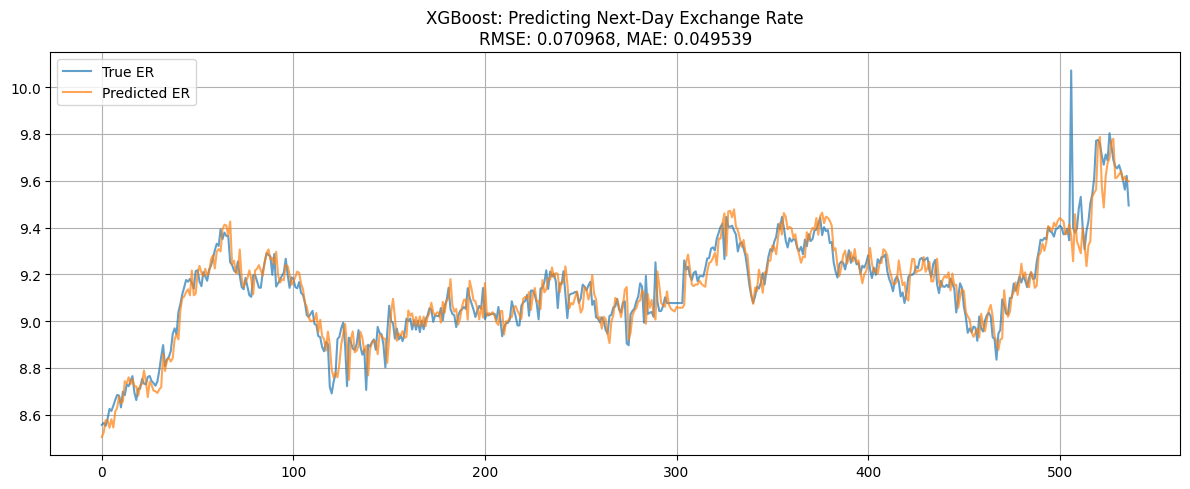

In [16]:
# ÊûÑÈÄ†ÁõÆÊ†áÂèòÈáèÔºö‰∏ã‰∏ÄÊúü ER
df['target'] = df['ER'].shift(-1)

df_model = df.dropna()

features = ['shock_flag','vol_mom','rolling_std_10','return_3','return_2','return_1','price_minus_SMA5','price_SMA5_ratio','SMA_5', 'SMA_10', 'Momentum_5', 'rate_diff','Volatility_5','RSI_14','SMA_diff','price_return_interact','trade_war','dayofweek','is_month_end','garch_vol','vol_spike','trend_5']
X = df_model[features]
y = df_model['target']

# Êó∂Èó¥È°∫Â∫èÂàÜÂâ≤Êï∞ÊçÆ
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

# ÊûÑÂª∫Ê®°Âûã
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, max_depth=3)
model.fit(X_train, y_train)

# È¢ÑÊµã
y_pred = model.predict(X_test)

# ËØÑ‰º∞
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

# ÂèØËßÜÂåñ
plt.figure(figsize=(12, 5))
plt.plot(y_test.values, label='True ER', alpha=0.7)
plt.plot(y_pred, label='Predicted ER', alpha=0.7)
plt.title(f'XGBoost: Predicting Next-Day Exchange Rate\nRMSE: {rmse:.6f}, MAE: {mae:.6f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


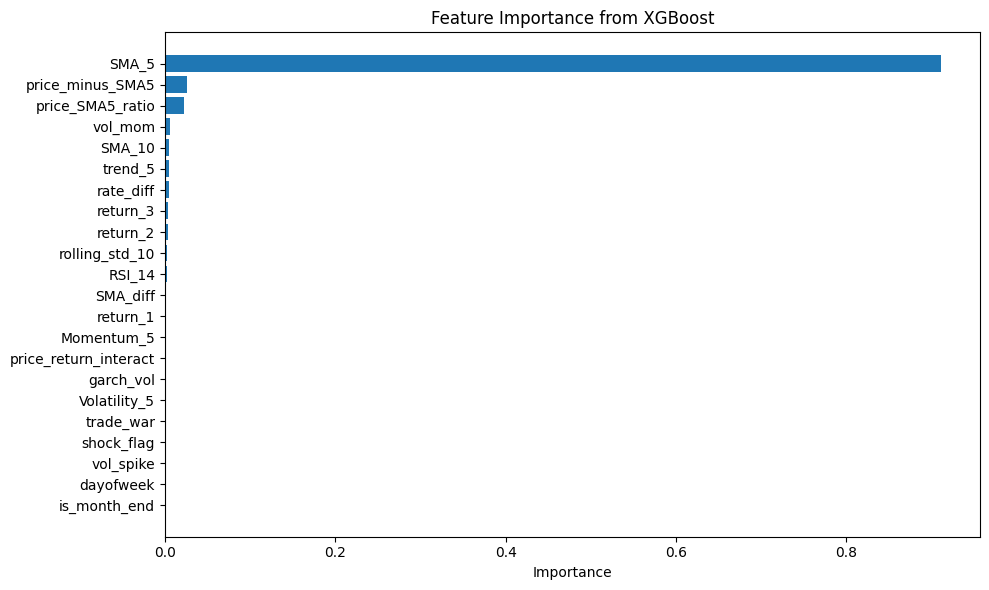

In [17]:
# Ëé∑ÂèñÁâπÂæÅÈáçË¶ÅÊÄß
importances = model.feature_importances_
features = X_test.columns

# ËΩ¨‰∏∫DataFrameÔºå‰æø‰∫éÊéíÂ∫èÂíåÂèØËßÜÂåñ
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# ÂèØËßÜÂåñ
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()  # ÈáçË¶ÅÊÄßÈ´òÁöÑÊîæÂú®‰∏äÈù¢
plt.title('Feature Importance from XGBoost')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [18]:
pred_df = pd.DataFrame(y_pred)
y_test = y_test.iloc[:-1]
error_cal = pd.DataFrame({})
error_cal['pred'] = pred_df
y_mid = y_test.reset_index(drop=True)
error_cal['actual'] = y_mid
error_cal['error'] = error_cal['pred'] - error_cal['actual']

In [19]:
# ËÆ°ÁÆóÂÆûÈôÖÂÄºÂíåÈ¢ÑÊµãÂÄºÁöÑÂèòÂåñË∂ãÂäøÔºàÁõ∏ÈÇªÂ§©Êï∞Â∑ÆÔºâ
actual_diff = error_cal['actual'].diff()
pred_diff = error_cal['pred'].diff()

# Âà§Êñ≠Ë∂ãÂäøÊòØÂê¶‰∏ÄËá¥ÔºàÂêå‰∏∫Ê≠£ÊàñÂêå‰∏∫Ë¥ü ‚Üí Áõ∏‰πòÂ§ß‰∫é0Ôºâ
trend_correct = (actual_diff * pred_diff) > 0

# ÂéªÈô§Á¨¨‰∏Ä‰∏™ NaNÔºàÂõ†‰∏∫ diff ‰ºöÂú®Á¨¨‰∏ÄË°åÁîüÊàê NaNÔºâ
trend_correct = trend_correct[1:-1]

# ËÆ°ÁÆóÊ≠£Á°ÆÊØî‰æã
trend_accuracy = trend_correct.sum() / len(trend_correct)

# ËæìÂá∫
print(f"üìà Ë∂ãÂäøÂà§Êñ≠Ê≠£Á°ÆÁöÑÊØî‰æã‰∏∫: {trend_accuracy:.2%}")

üìà Ë∂ãÂäøÂà§Êñ≠Ê≠£Á°ÆÁöÑÊØî‰æã‰∏∫: 46.36%


In [20]:
threshold = 0.05
proportion = (error_cal['error'].abs() > threshold).mean()

print(f"ËØØÂ∑ÆÂ§ß‰∫é 0.05 ÁöÑÊØî‰æã‰∏∫Ôºö{proportion:.2%}")

ËØØÂ∑ÆÂ§ß‰∫é 0.05 ÁöÑÊØî‰æã‰∏∫Ôºö36.31%


## Prediction Application

In [21]:
today = date.today()

In [22]:
# Ëé∑Âèñ‰∫∫Ê∞ëÂ∏ÅÂÖëËã±ÈïëÊ±áÁéáÔºàYahoo symbol: CNYGBP=XÔºâ
data = yf.download("CNYGBP=X", start="2015-01-01", end=today)
er_df = data[["Close"]].rename(columns={"Close": "CNY/GBP"})
display(er_df)

[*********************100%***********************]  1 of 1 completed


Price        CNY/GBP
Ticker      CNYGBP=X
Date                
2015-01-01  0.103420
2015-01-02  0.103330
2015-01-05  0.104920
2015-01-06  0.105350
2015-01-07  0.106450
...              ...
2025-05-19  0.104254
2025-05-20  0.103815
2025-05-21  0.103379
2025-05-22  0.103449
2025-05-23  0.102870

[2707 rows x 1 columns]

In [23]:
er_df['inverse'] = 1 / er_df['CNY/GBP', 'CNYGBP=X']
er_df

Price        CNY/GBP   inverse
Ticker      CNYGBP=X          
Date                          
2015-01-01  0.103420  9.669310
2015-01-02  0.103330  9.677731
2015-01-05  0.104920  9.531071
2015-01-06  0.105350  9.492169
2015-01-07  0.106450  9.394082
...              ...       ...
2025-05-19  0.104254  9.591958
2025-05-20  0.103815  9.632520
2025-05-21  0.103379  9.673144
2025-05-22  0.103449  9.666599
2025-05-23  0.102870  9.721007

[2707 rows x 2 columns]

In [24]:
policy_df = pd.read_excel("IR.xlsx")
policy_df['rate_diff'] = policy_df['UK'] - policy_df['CN']

model_df = policy_df.copy()

In [25]:
# Á°Æ‰øù Date ÊòØ datetime Á±ªÂûã
model_df['Date'] = pd.to_datetime(model_df['Date'])

# ‰øùÁïôÂ∑•‰ΩúÊó•ÔºàÂë®‰∏ÄÂà∞Âë®‰∫îÔºâ
df_weekday = model_df[model_df['Date'].dt.dayofweek < 5].copy()

# ÊåâÊó•ÊúüÊéíÂ∫èÔºàÂèØÈÄâÔºâ
df_weekday = df_weekday.sort_values('Date').reset_index(drop=True)

In [26]:
missing_dates = df_weekday[~df_weekday['Date'].isin(er_df.index)]
display(missing_dates['Date'].tail(10))

# Á°Æ‰øù Date ÂàóÊ†ºÂºè‰∏ÄËá¥
df_weekday['Date'] = pd.to_datetime(df_weekday['Date']).dt.normalize()

# Á≠õÈÄâ df_weekday ‰∏≠‰ªÖ‰øùÁïôÈÇ£‰∫õÂá∫Áé∞Âú® er_df['Date'] ‰∏≠ÁöÑË°å
df_weekday_aligned = df_weekday[df_weekday['Date'].isin(er_df.index)].copy()

# ÈáçÁΩÆÁ¥¢ÂºïÔºàÂèØÈÄâÔºâ
df_weekday_aligned = df_weekday_aligned.reset_index(drop=True)

df_weekday_aligned

658    2017-07-11
750    2017-11-16
2609   2025-01-01
2686   2025-04-18
2687   2025-04-21
Name: Date, dtype: datetime64[ns]

Date    UK   CN  rate_diff
0    2015-01-01  0.50  5.6      -5.10
1    2015-01-02  0.50  5.6      -5.10
2    2015-01-05  0.50  5.6      -5.10
3    2015-01-06  0.50  5.6      -5.10
4    2015-01-07  0.50  5.6      -5.10
...         ...   ...  ...        ...
2694 2025-05-07  4.25  3.1       1.15
2695 2025-05-08  4.25  3.1       1.15
2696 2025-05-09  4.25  3.1       1.15
2697 2025-05-12  4.25  3.1       1.15
2698 2025-05-13  4.25  3.1       1.15

[2699 rows x 4 columns]

In [27]:
while len(df_weekday_aligned['Date']) < len(er_df.index):
    df_weekday_aligned.loc[len(df_weekday_aligned['Date'])] = [er_df.index[len(df_weekday_aligned)], 4.25,3.1,1.15]

In [28]:
er_mid = er_df['inverse'].reset_index(drop=True)

df_weekday_aligned['ER'] = er_mid
df_weekday_aligned

Date    UK   CN  rate_diff        ER
0    2015-01-01  0.50  5.6      -5.10  9.669310
1    2015-01-02  0.50  5.6      -5.10  9.677731
2    2015-01-05  0.50  5.6      -5.10  9.531071
3    2015-01-06  0.50  5.6      -5.10  9.492169
4    2015-01-07  0.50  5.6      -5.10  9.394082
...         ...   ...  ...        ...       ...
2702 2025-05-19  4.25  3.1       1.15  9.591958
2703 2025-05-20  4.25  3.1       1.15  9.632520
2704 2025-05-21  4.25  3.1       1.15  9.673144
2705 2025-05-22  4.25  3.1       1.15  9.666599
2706 2025-05-23  4.25  3.1       1.15  9.721007

[2707 rows x 5 columns]

In [29]:
def recalculate_features(df):
    df = df.copy()

    # ÊªûÂêéÊî∂ÁõäÁéá
    df['return_1'] = df['ER'].pct_change()
    df['SMA_5'] = df['ER'].rolling(window=5).mean()
    df['SMA_10'] = df['ER'].rolling(window=10).mean()
    df['Momentum_5'] = df['ER'] - df['ER'].shift(5)
    df['Volatility_5'] = df['return_1'].rolling(window=5).std()

    df['SMA_diff'] = df['SMA_5'] - df['SMA_10']
    df['price_SMA5_ratio'] = df['ER'] / df['SMA_5']
    df['price_minus_SMA5'] = df['ER'] - df['SMA_5']

    df['return_2'] = df['ER'].pct_change(2)
    df['return_3'] = df['ER'].pct_change(3)

    df['rolling_std_10'] = df['ER'].rolling(window=10).std()

    df['vol_mom'] = df['Volatility_5'] * df['Momentum_5']
    df['price_return_interact'] = df['price_minus_SMA5'] * df['return_1']

    df['shock'] = (df['ER'].pct_change().abs() > 0.2).astype(int)

    df['trade_war'] = 0
    df.loc[(df['Date'] >= '2018-07-01') & (df['Date'] <= '2019-12-31'), 'trade_war'] = 1
    df.loc[(df['Date'] >= '2025-04-02'), 'trade_war'] = 1

    df['rolling_return'] = df['ER'].pct_change().rolling(3).sum()
    df['shock_flag'] = (df['rolling_return'].abs() > 0.03).astype(int)

    # RSI
    delta = df['ER'].diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=14).mean()
    avg_loss = loss.rolling(window=14).mean()
    rs = avg_gain / avg_loss
    df['RSI_14'] = 100 - (100 / (1 + rs))

    return df


In [30]:
latest_features = df[model.feature_names_in_].iloc[-1].values.reshape(1, -1)

predicted_tomorrow = model.predict(latest_features)[0]
print(f"‚úÖ ÊòéÂ§©ÁöÑÈ¢ÑÊµãÊ±áÁéáÊòØÔºö{predicted_tomorrow:.4f}")

‚úÖ ÊòéÂ§©ÁöÑÈ¢ÑÊµãÊ±áÁéáÊòØÔºö9.5063


In [31]:
def predict_next_n_days(df, model, n_days=7):
    df_extended = df.copy()
    predictions = []
    df_extended.index = pd.to_datetime(df_extended.index, errors='coerce')
    for i in range(n_days):
        # Ëé∑ÂèñÊúÄÊñ∞‰∏ÄË°åÊï∞ÊçÆ‰Ωú‰∏∫ËæìÂÖ•
        latest_features = df_extended[model.feature_names_in_].iloc[-1].values.reshape(1, -1)
        pred = model.predict(latest_features)[0]
        df_extended.index = pd.to_datetime(df_extended.index)
        # ‰øùÂ≠òÈ¢ÑÊµãÁªìÊûú
        predictions.append(pred)
        # ÊûÑÈÄ†‰∏ã‰∏ÄË°åÊï∞ÊçÆÔºöÂ§çÂà∂ÊúÄÂêé‰∏ÄË°åÔºåÂπ∂ÊõøÊç¢Ê±áÁéá‰∏∫È¢ÑÊµãÂÄº
        next_day = df_extended.index[-1] + pd.Timedelta(days=1)
        new_row = df_extended.iloc[-1].copy()
        new_row['ER'] = pred
        df_extended.loc[next_day] = new_row  # Ëá™Âä®Áª≠‰∏ä
        df_extended = recalculate_features(df_extended)

    return predictions


In [32]:
pred = predict_next_n_days(df, model, n_days=7)
pred

[np.float32(9.506288),
 np.float32(9.487847),
 np.float32(9.453669),
 np.float32(9.397203),
 np.float32(9.447822),
 np.float32(9.435051),
 np.float32(9.42793)]

In [33]:
df_pred = er_df['inverse'].copy()
last_date = df_pred.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=len(pred))

for i in range(len(pred)):
    df_pred.loc[future_dates[i]] = pred[i]
df_pred

Date
2015-01-01    9.669310
2015-01-02    9.677731
2015-01-05    9.531071
2015-01-06    9.492169
2015-01-07    9.394082
                ...   
2025-05-26    9.453669
2025-05-27    9.397203
2025-05-28    9.447822
2025-05-29    9.435051
2025-05-30    9.427930
Name: inverse, Length: 2714, dtype: float64

In [34]:
def plot_prediction(df_pred, forecast_days=7):
    df_pred = df_pred.copy()
    df_pred.index = pd.to_datetime(df_pred.index)

    # Êï¥ÊÆµÁîªÂÆåÊï¥ÁöÑËìùÁ∫ø
    display_range = df_pred.iloc[-(forecast_days + 30):]

    plt.figure(figsize=(10, 5))
    plt.plot(display_range.index, display_range.values, label='Historical + Forecast', color='blue', linewidth=2)

    # ÂÜçË¶ÜÁõñÈ¢ÑÊµãÈÉ®ÂàÜÔºàÊç¢È¢úËâ≤„ÄÅËôöÁ∫øÔºâ
    forecast = df_pred.iloc[-forecast_days:]
    plt.plot(forecast.index, forecast.values, label='Forecast (Next 7 days)', color='orange', linestyle='--', marker='o')

    plt.title('CNY/GBP Exchange Rate: Last 30 Days + 7-Day Forecast')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

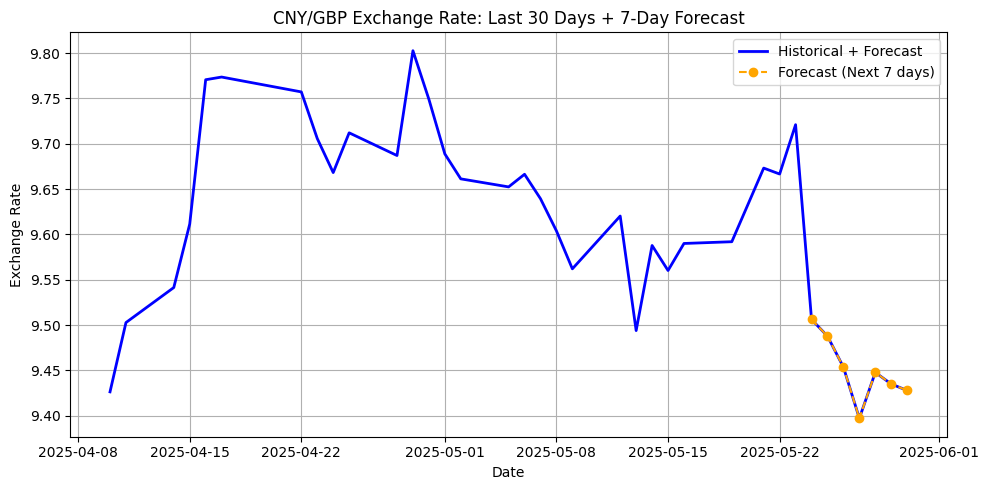

In [35]:
plot_prediction(df_pred, forecast_days=7)